In [1]:
## Modules 
import pandas as pd
import numpy as np
import scipy as sp
import warnings
warnings.filterwarnings('ignore')

from sklearn.cross_validation import train_test_split
from IPython.display import Image
# import pydotplus #make sure you have this installed
import matplotlib.pyplot as plt

from io import StringIO
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Load Data in Arff format

In [3]:
from scipy.io import arff
import pandas as pd

data = arff.loadarff('data/Training Dataset.arff')
df = pd.DataFrame(data[0])
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,b'-1',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'-1',b'1',...,b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'1',b'1',b'-1',b'-1'
1,b'1',b'1',b'1',b'1',b'1',b'-1',b'0',b'1',b'-1',b'1',...,b'1',b'1',b'-1',b'-1',b'0',b'-1',b'1',b'1',b'1',b'-1'
2,b'1',b'0',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'1',...,b'1',b'1',b'1',b'-1',b'1',b'-1',b'1',b'0',b'-1',b'-1'
3,b'1',b'0',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'1',b'1',...,b'1',b'1',b'-1',b'-1',b'1',b'-1',b'1',b'-1',b'1',b'-1'
4,b'1',b'0',b'-1',b'1',b'1',b'-1',b'1',b'1',b'-1',b'1',...,b'-1',b'1',b'-1',b'-1',b'0',b'-1',b'1',b'1',b'1',b'1'


In [4]:
# Converting column values from string to integer
df = df.apply(pd.to_numeric)
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [5]:
num_samples = df.shape[0]
num_features = df.shape[1]
print("No of samples:", num_samples)
print("No of features:", num_features)

No of samples: 11055
No of features: 31


In [6]:
features = df.columns[0:num_features-1]
target = 'Result'
features_list = features.tolist()
dt_data = df[features]

X = dt_data.values
y = (df[target]==1)*1

## Creating training and testing data for the model
Xtr, Xts, ytr, yts = train_test_split(X, y, train_size=.80)

In [7]:
# Scale data to apply to neural networks

In [8]:
xmean = np.mean(Xtr,axis=0)
xstd = np.std(Xtr,axis=0)
Xtr_scale = (Xtr-xmean[None,:])/xstd[None,:]
Xts_scale = (Xts-xmean[None,:])/xstd[None,:]

In [9]:
# Self Structuring Neural Network MODEL

In [10]:
import keras
from keras.models import Model, Sequential
from keras.layers import Dense, Activation
import keras.backend as K
from keras import optimizers


Using TensorFlow backend.


In [11]:
nin = Xtr.shape[1]
nout = 1

In [12]:
#Initial Parameters
max_nh = 8
num_epochs = 50
init_lr = lr = 0.8
batch_size = 100



In [13]:
# Function to generate a keras Neural Network model with one hidden neutron and one output neutron

In [14]:
def generate_model(nh=1,lr=0.8):
    K.clear_session()    
    model = Sequential()
    initializer = keras.initializers.RandomUniform(minval=-0.5, maxval=0.5, seed=None)
    model.add(Dense(nh, input_shape=(nin,),  kernel_initializer='random_uniform', activation='sigmoid', name='hidden'))
    model.add(Dense(1, activation='sigmoid', name='output'))
    opt = optimizers.Adam(lr=lr)
    model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
    print(model.summary())
    return model

Function to run the model for num_epochs, If the error rate in any epoch matches the desored error rate DER, 
the function set the der_achieved flag as true and breaks out tof loop and returns the model results.

In [15]:
def run_model(model,iteration,der,num_epochs):
    der_achieved = False
    print("Iteration:",iteration)
    print("Max number of epochs:", num_epochs)
    for i in range(num_epochs):
        print()
        hist = model.fit(Xtr_scale, ytr, epochs=1, batch_size=batch_size, validation_data=(Xts_scale,yts))
        error = hist.history['loss'][0]
        if error == der:
            der_achieved = True
            print("epoc:",i,"error:",error)
            break
            
    return i,hist,der_achieved

# Self Structuring Neural Network Algorithm

Self Structuring Neural Network Model is an adaptive approach to find the suitable neutral network for a given problem. It itlsef search for the most appropriate structure in terms of number of hidden units and learning rate.

Pseudo Code:

1. Step 1:
   Start with the the simplest neural network, which consists of only one neuron in the hidden layer. Traditionally 
   number of neurons in the input and output layers is determined based on the problem. But in our case, Nh = 1 and  
   NO=1 respectively. Non-zero random values from -0.5 to 0.5 are assigned for weights for each  connection.Unlike 
   traditional models, learning rate is not fixed in our case.The learning rate is set to a very big value so as to 
   converge quickly to the possible solutions. Then we adjust the learning rate and analyse all the possible solutions 
   more closely
        Initial_learning_rate ( init_lr ) = 0.8
        Initial Desired Error rate (DER) = 0.9

2. Step 2: 
   The model runs one epoch only to determine the desired error rate “DER” to be achieved in the next iteration(s). 
3. Step 3.
   Train the network until the “DER” or maximum number of epochs is achieved

4. Step 4.
   If “DER” is achieved before reaching the maximum epochs, there is a possibility of improving the network accuracy 
   in the next iteration(s), thus we set DER = CER and go back to Step 3. Otherwise go to Step 5.

5. Step 5. 
   If the maximum number of epochs is reached without achieving the “DER”, we maintain the network structure
   and try to improve the network accuracy by adjusting the learning rate. 
                                        η′ = η ∗ 0.90 

   We choose to adjust the learning rate before the network expansion because adjusting the learning rate is that in      some regions the gradient is large and we need a large step size whereas  in other regions, whereas whenever we     
   come closer to a local minimum, the gradient is small and we need a small step size After adjusting the learning 
   rate we set DER = CER and train the network. If DER is achieved then we go back to step 3 to improve the network 
   performance based on the new learning rate. Otherwise, we go to step 6. 

6. Step 6. 
   The model now adds a new neuron to the hidden layer and train the network. Now we got to Step 3 aiming to 
   update the DER. If the DER is still not achieved , we stop the training and generate the final model.
   
We'll try this seld structuring algorithm for different number of maximum epochs = [50,100,200,500,1000]


In [16]:
def self_structure_nn(num_epochs,model):
    lr = init_lr 
    der_achieved = False
    der = 0.9
    nh = 1

    # Step1: Run on one epoch and check if the calculated error rate CER is less than Desired eroor rate DER
    hist=model.fit(Xtr_scale, ytr, epochs=1, batch_size=batch_size, validation_data=(Xts_scale,yts))
    cer = hist.history['loss'][0]
   
    print("CER:",cer)

    #Step 2: Check if cer < der, if yes train the model on all epochs
    if cer < der:
        der = cer
        print(der)
        iteration = 1

        epochs,hist,der_achieved = run_model(model,iteration,der,num_epochs)  

        # Step 3 : if der is achieved under max num of epochs, train the model again
        while(1):
            if der_achieved and epochs < num_epochs:
                iteration = iteration +1
                print("Need to train the model again")
                epochs,hist,der_achieved = run_model(model,iteration,der,num_epochs)

            # Step 4. If der is not achieved under the max num of epochs , decrease the learning rate
            if (not der_achieved) or (epochs >= num_epochs):
                print("der is not achieved,will have to adjust the learning rate")
                lr = lr*0.9
                epochs, hist, der_achieved = run_model(model,iteration,der,num_epochs)
                # Step 5: If der is still not achieved under the max num of epochs , increase the number of hidden neutrons
                if not der_achieved :
                    print("der is not achieved, will have to icrease number of hidden units")
                    # number of hidden neutrons should be less that or equal to max number of neutrons
                    if nh+1 <= max_nh:
                        nh = nh+1
                        print(nh)
                        model = generate_model(nh,lr)
                        epochs, hist, der_achieved = run_model(model,iteration,der,num_epochs)
                        if not der_achieved:
                            print("Model cannot be improved further")
                            break
                    else:
                          break

        return lr, hist,nh


Arrays to store the final learning rates, number of hidden neutrons and model histories for various num of epochs
= [50,100,200,500,100]

In [17]:
lrs=[]
histories  = []
hidden_units = []


In [75]:
epochs_list = [50,100,200,500,1000]

In [18]:
# Generate a self structuring Model for epochs = 50

In [19]:
model = generate_model()
lr, hist,nh = self_structure_nn(50,model)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 1)                 31        
_________________________________________________________________
output (Dense)               (None, 1)                 2         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________
None
Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 34us/step - loss: 0.3626 - acc: 0.8593 - val_loss: 0.2950 - val_acc: 0.9073
CER: 0.3625867657939647
0.3625867657939647
Iteration: 1
Max number of epochs: 50

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2803 - acc: 0.9203 - val_loss: 0.2906 - val_acc: 0.9154

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [=====================

8844/8844 [==============================] - 0s 15us/step - loss: 0.2494 - acc: 0.9332 - val_loss: 0.2806 - val_acc: 0.9236

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2421 - acc: 0.9355 - val_loss: 0.2641 - val_acc: 0.9267

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 16us/step - loss: 0.2477 - acc: 0.9352 - val_loss: 0.2651 - val_acc: 0.9254

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 16us/step - loss: 0.2526 - acc: 0.9331 - val_loss: 0.3081 - val_acc: 0.9213

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 16us/step - loss: 0.2585 - acc: 0.9311 - val_loss: 0.2826 - val_acc: 0.9236

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2560 - acc: 0.932

8844/8844 [==============================] - 0s 15us/step - loss: 0.2248 - acc: 0.9249 - val_loss: 0.2375 - val_acc: 0.9213

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2179 - acc: 0.9276 - val_loss: 0.2389 - val_acc: 0.9240

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2218 - acc: 0.9303 - val_loss: 0.2369 - val_acc: 0.9172

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2267 - acc: 0.9251 - val_loss: 0.2304 - val_acc: 0.9245

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2224 - acc: 0.9264 - val_loss: 0.2353 - val_acc: 0.9136

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2251 - acc: 0.924

In [20]:
hist.history

{'acc': [0.923450927478811],
 'loss': [0.21430556762210387],
 'val_acc': [0.9167797415572451],
 'val_loss': [0.21902215965210126]}

In [21]:
hidden_units.append(nh)
lrs.append(lr)
histories.append(hist.history)

In [22]:
histories

[{'acc': [0.923450927478811],
  'loss': [0.21430556762210387],
  'val_acc': [0.9167797415572451],
  'val_loss': [0.21902215965210126]}]

In [23]:
## Generate a self structuring Model for epochs = 100
model = generate_model()
lr, hist,nh = self_structure_nn(100,model)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 1)                 31        
_________________________________________________________________
output (Dense)               (None, 1)                 2         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________
None
Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 33us/step - loss: 0.3106 - acc: 0.8997 - val_loss: 0.2647 - val_acc: 0.9227
CER: 0.3106498324132408
0.3106498324132408
Iteration: 1
Max number of epochs: 100

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2686 - acc: 0.9244 - val_loss: 0.3110 - val_acc: 0.9154

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [====================

8844/8844 [==============================] - 0s 15us/step - loss: 0.2527 - acc: 0.9331 - val_loss: 0.2857 - val_acc: 0.9181

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2564 - acc: 0.9300 - val_loss: 0.2840 - val_acc: 0.9199

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2529 - acc: 0.9328 - val_loss: 0.2686 - val_acc: 0.9254

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2495 - acc: 0.9325 - val_loss: 0.2718 - val_acc: 0.9236

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2490 - acc: 0.9325 - val_loss: 0.2699 - val_acc: 0.9240

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2405 - acc: 0.936

8844/8844 [==============================] - 0s 17us/step - loss: 0.2591 - acc: 0.9299 - val_loss: 0.2827 - val_acc: 0.9236

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2529 - acc: 0.9328 - val_loss: 0.2769 - val_acc: 0.9227

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2556 - acc: 0.9310 - val_loss: 0.2801 - val_acc: 0.9213

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2464 - acc: 0.9337 - val_loss: 0.2901 - val_acc: 0.9177

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2598 - acc: 0.9290 - val_loss: 0.2800 - val_acc: 0.9209

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2842 - acc: 0.921

8844/8844 [==============================] - 0s 15us/step - loss: 0.2431 - acc: 0.9353 - val_loss: 0.2796 - val_acc: 0.9199

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2488 - acc: 0.9340 - val_loss: 0.2788 - val_acc: 0.9249

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 16us/step - loss: 0.2539 - acc: 0.9334 - val_loss: 0.2731 - val_acc: 0.9231

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 17us/step - loss: 0.2496 - acc: 0.9337 - val_loss: 0.2724 - val_acc: 0.9236

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 17us/step - loss: 0.2472 - acc: 0.9334 - val_loss: 0.3397 - val_acc: 0.9249

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2556 - acc: 0.933

8844/8844 [==============================] - 0s 14us/step - loss: 0.2211 - acc: 0.9241 - val_loss: 0.2348 - val_acc: 0.9231

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2204 - acc: 0.9245 - val_loss: 0.2169 - val_acc: 0.9213

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2256 - acc: 0.9206 - val_loss: 0.2311 - val_acc: 0.9086

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2238 - acc: 0.9135 - val_loss: 0.2279 - val_acc: 0.9086

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2169 - acc: 0.9182 - val_loss: 0.2426 - val_acc: 0.8951

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 16us/step - loss: 0.2120 - acc: 0.919

8844/8844 [==============================] - 0s 18us/step - loss: 0.2292 - acc: 0.9186 - val_loss: 0.2234 - val_acc: 0.9168

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2203 - acc: 0.9241 - val_loss: 0.2271 - val_acc: 0.9209

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2119 - acc: 0.9264 - val_loss: 0.2170 - val_acc: 0.9218

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2182 - acc: 0.9276 - val_loss: 0.2156 - val_acc: 0.9276

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2165 - acc: 0.9263 - val_loss: 0.2523 - val_acc: 0.9213

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2178 - acc: 0.923

In [24]:
hidden_units.append(nh)
lrs.append(lr)
histories.append(hist.history)

In [25]:
## Generate a self structuring Model for epochs = 200
model = generate_model()
lr, hist,nh = self_structure_nn(200,model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 1)                 31        
_________________________________________________________________
output (Dense)               (None, 1)                 2         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________
None
Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 35us/step - loss: 0.3415 - acc: 0.8808 - val_loss: 0.3103 - val_acc: 0.9059
CER: 0.3414627197221737
0.3414627197221737
Iteration: 1
Max number of epochs: 200

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2772 - acc: 0.9180 - val_loss: 0.2965 - val_acc: 0.9132

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [====================

8844/8844 [==============================] - 0s 15us/step - loss: 0.2498 - acc: 0.9326 - val_loss: 0.2736 - val_acc: 0.9240

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2461 - acc: 0.9345 - val_loss: 0.2743 - val_acc: 0.9222

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2508 - acc: 0.9327 - val_loss: 0.2694 - val_acc: 0.9245

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2507 - acc: 0.9319 - val_loss: 0.3216 - val_acc: 0.9181

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2608 - acc: 0.9292 - val_loss: 0.3073 - val_acc: 0.9172

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2625 - acc: 0.928

8844/8844 [==============================] - 0s 15us/step - loss: 0.2430 - acc: 0.9351 - val_loss: 0.2695 - val_acc: 0.9236

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2481 - acc: 0.9349 - val_loss: 0.2746 - val_acc: 0.9213

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 18us/step - loss: 0.2578 - acc: 0.9328 - val_loss: 0.2857 - val_acc: 0.9272

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 16us/step - loss: 0.2686 - acc: 0.9274 - val_loss: 0.2880 - val_acc: 0.9213

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2476 - acc: 0.9343 - val_loss: 0.2718 - val_acc: 0.9240

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2531 - acc: 0.934

8844/8844 [==============================] - 0s 17us/step - loss: 0.2516 - acc: 0.9325 - val_loss: 0.2685 - val_acc: 0.9240

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 17us/step - loss: 0.2599 - acc: 0.9333 - val_loss: 0.2954 - val_acc: 0.9168

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 18us/step - loss: 0.2599 - acc: 0.9303 - val_loss: 0.2835 - val_acc: 0.9218

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 17us/step - loss: 0.2554 - acc: 0.9306 - val_loss: 0.2633 - val_acc: 0.9267

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 17us/step - loss: 0.2493 - acc: 0.9335 - val_loss: 0.2670 - val_acc: 0.9276

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 18us/step - loss: 0.2461 - acc: 0.935

8844/8844 [==============================] - 0s 15us/step - loss: 0.2431 - acc: 0.9358 - val_loss: 0.2839 - val_acc: 0.9236

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2507 - acc: 0.9365 - val_loss: 0.2633 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2456 - acc: 0.9360 - val_loss: 0.2860 - val_acc: 0.9263

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 18us/step - loss: 0.2440 - acc: 0.9350 - val_loss: 0.2655 - val_acc: 0.9254

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 17us/step - loss: 0.2533 - acc: 0.9317 - val_loss: 0.3092 - val_acc: 0.9190

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 16us/step - loss: 0.2617 - acc: 0.928

8844/8844 [==============================] - 0s 18us/step - loss: 0.2555 - acc: 0.9329 - val_loss: 0.2650 - val_acc: 0.9276

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 17us/step - loss: 0.2467 - acc: 0.9350 - val_loss: 0.2646 - val_acc: 0.9254

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 17us/step - loss: 0.2467 - acc: 0.9352 - val_loss: 0.2638 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 17us/step - loss: 0.2520 - acc: 0.9350 - val_loss: 0.2790 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2452 - acc: 0.9343 - val_loss: 0.2634 - val_acc: 0.9267

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 17us/step - loss: 0.2537 - acc: 0.933

8844/8844 [==============================] - 0s 18us/step - loss: 0.2522 - acc: 0.9326 - val_loss: 0.2678 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 16us/step - loss: 0.2494 - acc: 0.9322 - val_loss: 0.2799 - val_acc: 0.9240

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 17us/step - loss: 0.2582 - acc: 0.9299 - val_loss: 0.2838 - val_acc: 0.9249

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2526 - acc: 0.9319 - val_loss: 0.2730 - val_acc: 0.9222

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 17us/step - loss: 0.2546 - acc: 0.9309 - val_loss: 0.2825 - val_acc: 0.9227

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 19us/step - loss: 0.2489 - acc: 0.933

8844/8844 [==============================] - 0s 16us/step - loss: 0.2803 - acc: 0.9276 - val_loss: 0.4093 - val_acc: 0.9127

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2726 - acc: 0.9277 - val_loss: 0.2847 - val_acc: 0.9204

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2594 - acc: 0.9291 - val_loss: 0.3012 - val_acc: 0.9172

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2580 - acc: 0.9294 - val_loss: 0.2824 - val_acc: 0.9209

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2538 - acc: 0.9319 - val_loss: 0.2720 - val_acc: 0.9245

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 16us/step - loss: 0.2471 - acc: 0.934

8844/8844 [==============================] - 0s 16us/step - loss: 0.2646 - acc: 0.9309 - val_loss: 0.2948 - val_acc: 0.9163
der is not achieved, will have to icrease number of hidden units
2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 2)                 62        
_________________________________________________________________
output (Dense)               (None, 1)                 3         
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________
None
Iteration: 1
Max number of epochs: 200

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 35us/step - loss: 0.2855 - acc: 0.8936 - val_loss: 0.2508 - val_acc: 0.8987

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss:

8844/8844 [==============================] - 0s 15us/step - loss: 0.2136 - acc: 0.9246 - val_loss: 0.2221 - val_acc: 0.9209

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2210 - acc: 0.9133 - val_loss: 0.2196 - val_acc: 0.9168

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2247 - acc: 0.9177 - val_loss: 0.2468 - val_acc: 0.9127

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2262 - acc: 0.9158 - val_loss: 0.2731 - val_acc: 0.9177

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2310 - acc: 0.9155 - val_loss: 0.2547 - val_acc: 0.9190

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2245 - acc: 0.918

8844/8844 [==============================] - 0s 15us/step - loss: 0.2213 - acc: 0.9181 - val_loss: 0.2307 - val_acc: 0.9186

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 16us/step - loss: 0.2120 - acc: 0.9246 - val_loss: 0.2383 - val_acc: 0.9177

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 19us/step - loss: 0.2107 - acc: 0.9247 - val_loss: 0.2230 - val_acc: 0.9222

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 17us/step - loss: 0.2081 - acc: 0.9242 - val_loss: 0.2411 - val_acc: 0.8621

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 18us/step - loss: 0.2062 - acc: 0.9263 - val_loss: 0.2165 - val_acc: 0.9222

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2129 - acc: 0.915

8844/8844 [==============================] - 0s 16us/step - loss: 0.2208 - acc: 0.9177 - val_loss: 0.2274 - val_acc: 0.9186

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 16us/step - loss: 0.2150 - acc: 0.9279 - val_loss: 0.2223 - val_acc: 0.9181

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 16us/step - loss: 0.2124 - acc: 0.9261 - val_loss: 0.2311 - val_acc: 0.9177

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 16us/step - loss: 0.2145 - acc: 0.9265 - val_loss: 0.2282 - val_acc: 0.9236

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2080 - acc: 0.9248 - val_loss: 0.2151 - val_acc: 0.9267

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2141 - acc: 0.922

8844/8844 [==============================] - 0s 13us/step - loss: 0.2166 - acc: 0.9204 - val_loss: 0.2502 - val_acc: 0.9281

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2199 - acc: 0.9193 - val_loss: 0.2224 - val_acc: 0.9186

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2103 - acc: 0.9242 - val_loss: 0.2246 - val_acc: 0.8874

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2144 - acc: 0.9223 - val_loss: 0.2300 - val_acc: 0.9195

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2190 - acc: 0.9214 - val_loss: 0.2294 - val_acc: 0.9240

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2136 - acc: 0.926

In [26]:
hidden_units.append(nh)
lrs.append(lr)
histories.append(hist.history)

In [27]:
# Generate a self structuring Model for epochs = 500
model = generate_model()
lr, hist,nh = self_structure_nn(500,model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 1)                 31        
_________________________________________________________________
output (Dense)               (None, 1)                 2         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________
None
Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 41us/step - loss: 0.3454 - acc: 0.8797 - val_loss: 0.2784 - val_acc: 0.9181
CER: 0.34535039834971343
0.34535039834971343
Iteration: 1
Max number of epochs: 500

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2791 - acc: 0.9185 - val_loss: 0.3018 - val_acc: 0.9095

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==================

8844/8844 [==============================] - 0s 21us/step - loss: 0.2536 - acc: 0.9314 - val_loss: 0.2765 - val_acc: 0.9254

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 18us/step - loss: 0.2542 - acc: 0.9313 - val_loss: 0.2911 - val_acc: 0.9163

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 16us/step - loss: 0.2763 - acc: 0.9228 - val_loss: 0.2768 - val_acc: 0.9199

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2562 - acc: 0.9310 - val_loss: 0.2791 - val_acc: 0.9240

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2600 - acc: 0.9298 - val_loss: 0.2752 - val_acc: 0.9222

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 16us/step - loss: 0.2633 - acc: 0.929

8844/8844 [==============================] - 0s 14us/step - loss: 0.2647 - acc: 0.9276 - val_loss: 0.2796 - val_acc: 0.9209

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2678 - acc: 0.9259 - val_loss: 0.2920 - val_acc: 0.9177

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2620 - acc: 0.9284 - val_loss: 0.2789 - val_acc: 0.9190

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2610 - acc: 0.9287 - val_loss: 0.2685 - val_acc: 0.9240

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2566 - acc: 0.9311 - val_loss: 0.2774 - val_acc: 0.9254

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 16us/step - loss: 0.2667 - acc: 0.929

8844/8844 [==============================] - 0s 17us/step - loss: 0.2419 - acc: 0.9367 - val_loss: 0.2571 - val_acc: 0.9285

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2454 - acc: 0.9345 - val_loss: 0.2648 - val_acc: 0.9254

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2486 - acc: 0.9351 - val_loss: 0.2740 - val_acc: 0.9227

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2467 - acc: 0.9339 - val_loss: 0.2654 - val_acc: 0.9263

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2441 - acc: 0.9354 - val_loss: 0.2631 - val_acc: 0.9263

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2552 - acc: 0.930

8844/8844 [==============================] - 0s 12us/step - loss: 0.2492 - acc: 0.9350 - val_loss: 0.2711 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2437 - acc: 0.9360 - val_loss: 0.2690 - val_acc: 0.9267

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2481 - acc: 0.9336 - val_loss: 0.2737 - val_acc: 0.9240

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2493 - acc: 0.9333 - val_loss: 0.2709 - val_acc: 0.9254

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2496 - acc: 0.9332 - val_loss: 0.2858 - val_acc: 0.9249

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2495 - acc: 0.933

8844/8844 [==============================] - 0s 17us/step - loss: 0.2494 - acc: 0.9329 - val_loss: 0.2795 - val_acc: 0.9218

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 17us/step - loss: 0.2533 - acc: 0.9308 - val_loss: 0.2804 - val_acc: 0.9199

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2564 - acc: 0.9327 - val_loss: 0.2756 - val_acc: 0.9227

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2513 - acc: 0.9342 - val_loss: 0.2632 - val_acc: 0.9249

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 16us/step - loss: 0.2535 - acc: 0.9327 - val_loss: 0.2656 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2506 - acc: 0.933

8844/8844 [==============================] - 0s 17us/step - loss: 0.2427 - acc: 0.9357 - val_loss: 0.2873 - val_acc: 0.9236

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2468 - acc: 0.9339 - val_loss: 0.2720 - val_acc: 0.9240

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 18us/step - loss: 0.2491 - acc: 0.9346 - val_loss: 0.2731 - val_acc: 0.9231

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 18us/step - loss: 0.2416 - acc: 0.9357 - val_loss: 0.2872 - val_acc: 0.9240

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 17us/step - loss: 0.2472 - acc: 0.9352 - val_loss: 0.2683 - val_acc: 0.9245

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 17us/step - loss: 0.2429 - acc: 0.936

8844/8844 [==============================] - 0s 19us/step - loss: 0.2500 - acc: 0.9346 - val_loss: 0.3106 - val_acc: 0.9227

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 19us/step - loss: 0.2411 - acc: 0.9362 - val_loss: 0.2775 - val_acc: 0.9222

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 18us/step - loss: 0.2462 - acc: 0.9358 - val_loss: 0.2865 - val_acc: 0.9218

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 18us/step - loss: 0.2425 - acc: 0.9359 - val_loss: 0.2869 - val_acc: 0.9254

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 16us/step - loss: 0.2439 - acc: 0.9348 - val_loss: 0.2775 - val_acc: 0.9199

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2544 - acc: 0.932

8844/8844 [==============================] - 0s 17us/step - loss: 0.2427 - acc: 0.9353 - val_loss: 0.2642 - val_acc: 0.9254

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 19us/step - loss: 0.2436 - acc: 0.9355 - val_loss: 0.2950 - val_acc: 0.9254

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 16us/step - loss: 0.2486 - acc: 0.9342 - val_loss: 0.2688 - val_acc: 0.9245

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 16us/step - loss: 0.2490 - acc: 0.9340 - val_loss: 0.2638 - val_acc: 0.9254

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 16us/step - loss: 0.2471 - acc: 0.9339 - val_loss: 0.2612 - val_acc: 0.9263

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 16us/step - loss: 0.2467 - acc: 0.935

8844/8844 [==============================] - 0s 17us/step - loss: 0.2436 - acc: 0.9359 - val_loss: 0.2556 - val_acc: 0.9294

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 17us/step - loss: 0.2424 - acc: 0.9366 - val_loss: 0.2650 - val_acc: 0.9294

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 16us/step - loss: 0.2494 - acc: 0.9339 - val_loss: 0.2750 - val_acc: 0.9267

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 16us/step - loss: 0.2489 - acc: 0.9337 - val_loss: 0.2566 - val_acc: 0.9285

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 16us/step - loss: 0.2442 - acc: 0.9344 - val_loss: 0.2696 - val_acc: 0.9240

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 17us/step - loss: 0.2487 - acc: 0.934

8844/8844 [==============================] - 0s 16us/step - loss: 0.2503 - acc: 0.9351 - val_loss: 0.2664 - val_acc: 0.9263

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 17us/step - loss: 0.2424 - acc: 0.9354 - val_loss: 0.2716 - val_acc: 0.9254

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 16us/step - loss: 0.2428 - acc: 0.9357 - val_loss: 0.2678 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 16us/step - loss: 0.2433 - acc: 0.9362 - val_loss: 0.2726 - val_acc: 0.9272

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 16us/step - loss: 0.2396 - acc: 0.9366 - val_loss: 0.2664 - val_acc: 0.9267

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2371 - acc: 0.937

8844/8844 [==============================] - 0s 18us/step - loss: 0.2431 - acc: 0.9360 - val_loss: 0.2826 - val_acc: 0.9276

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 18us/step - loss: 0.2485 - acc: 0.9360 - val_loss: 0.2621 - val_acc: 0.9276

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 17us/step - loss: 0.2431 - acc: 0.9360 - val_loss: 0.2697 - val_acc: 0.9276

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 16us/step - loss: 0.2444 - acc: 0.9360 - val_loss: 0.2665 - val_acc: 0.9276

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 16us/step - loss: 0.2448 - acc: 0.9360 - val_loss: 0.2628 - val_acc: 0.9276

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 16us/step - loss: 0.2456 - acc: 0.936

8844/8844 [==============================] - 0s 17us/step - loss: 0.2536 - acc: 0.9318 - val_loss: 0.2840 - val_acc: 0.9204

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2559 - acc: 0.9318 - val_loss: 0.2863 - val_acc: 0.9204

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2591 - acc: 0.9318 - val_loss: 0.2801 - val_acc: 0.9204

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2562 - acc: 0.9318 - val_loss: 0.2991 - val_acc: 0.9204

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2625 - acc: 0.9318 - val_loss: 0.2961 - val_acc: 0.9204

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2534 - acc: 0.931

8844/8844 [==============================] - 0s 15us/step - loss: 0.2463 - acc: 0.9355 - val_loss: 0.2659 - val_acc: 0.9267

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2463 - acc: 0.9354 - val_loss: 0.2763 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 16us/step - loss: 0.2425 - acc: 0.9354 - val_loss: 0.2707 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2475 - acc: 0.9350 - val_loss: 0.2652 - val_acc: 0.9254

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 16us/step - loss: 0.2493 - acc: 0.9337 - val_loss: 0.2719 - val_acc: 0.9245

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 16us/step - loss: 0.2443 - acc: 0.935

8844/8844 [==============================] - 0s 14us/step - loss: 0.2442 - acc: 0.9359 - val_loss: 0.2738 - val_acc: 0.9245

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2416 - acc: 0.9357 - val_loss: 0.2778 - val_acc: 0.9245

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2447 - acc: 0.9357 - val_loss: 0.2689 - val_acc: 0.9245

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2519 - acc: 0.9332 - val_loss: 0.2683 - val_acc: 0.9245

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2505 - acc: 0.9323 - val_loss: 0.2748 - val_acc: 0.9249

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2485 - acc: 0.934

8844/8844 [==============================] - 0s 13us/step - loss: 0.2462 - acc: 0.9351 - val_loss: 0.2644 - val_acc: 0.9276

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2425 - acc: 0.9353 - val_loss: 0.2687 - val_acc: 0.9290

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 18us/step - loss: 0.2475 - acc: 0.9348 - val_loss: 0.2570 - val_acc: 0.9290

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2531 - acc: 0.9322 - val_loss: 0.2709 - val_acc: 0.9236

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2559 - acc: 0.9322 - val_loss: 0.2856 - val_acc: 0.9222

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2589 - acc: 0.930

8844/8844 [==============================] - 0s 13us/step - loss: 0.2467 - acc: 0.9346 - val_loss: 0.2720 - val_acc: 0.9245

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2477 - acc: 0.9343 - val_loss: 0.2678 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2472 - acc: 0.9348 - val_loss: 0.2711 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2428 - acc: 0.9353 - val_loss: 0.2662 - val_acc: 0.9263

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2448 - acc: 0.9350 - val_loss: 0.2648 - val_acc: 0.9267

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2435 - acc: 0.935

8844/8844 [==============================] - 0s 12us/step - loss: 0.2428 - acc: 0.9365 - val_loss: 0.2604 - val_acc: 0.9285

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2418 - acc: 0.9365 - val_loss: 0.2565 - val_acc: 0.9285

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2408 - acc: 0.9365 - val_loss: 0.2571 - val_acc: 0.9285

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2426 - acc: 0.9365 - val_loss: 0.2567 - val_acc: 0.9285

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2409 - acc: 0.9365 - val_loss: 0.2561 - val_acc: 0.9285

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2410 - acc: 0.936

8844/8844 [==============================] - 0s 12us/step - loss: 0.2437 - acc: 0.9365 - val_loss: 0.2765 - val_acc: 0.9285

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 11us/step - loss: 0.2445 - acc: 0.9365 - val_loss: 0.2580 - val_acc: 0.9285

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2427 - acc: 0.9365 - val_loss: 0.2560 - val_acc: 0.9285

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2427 - acc: 0.9365 - val_loss: 0.2612 - val_acc: 0.9285

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 11us/step - loss: 0.2417 - acc: 0.9365 - val_loss: 0.2617 - val_acc: 0.9285

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2397 - acc: 0.936

8844/8844 [==============================] - 0s 12us/step - loss: 0.2438 - acc: 0.9365 - val_loss: 0.2603 - val_acc: 0.9285

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 11us/step - loss: 0.2414 - acc: 0.9365 - val_loss: 0.2559 - val_acc: 0.9285

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 11us/step - loss: 0.2416 - acc: 0.9365 - val_loss: 0.2761 - val_acc: 0.9285

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 11us/step - loss: 0.2404 - acc: 0.9365 - val_loss: 0.2588 - val_acc: 0.9285

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2438 - acc: 0.9365 - val_loss: 0.2577 - val_acc: 0.9285

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2428 - acc: 0.936

8844/8844 [==============================] - 0s 11us/step - loss: 0.2449 - acc: 0.9365 - val_loss: 0.2646 - val_acc: 0.9285

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2413 - acc: 0.9365 - val_loss: 0.2668 - val_acc: 0.9285

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2397 - acc: 0.9365 - val_loss: 0.2598 - val_acc: 0.9285

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2452 - acc: 0.9365 - val_loss: 0.2578 - val_acc: 0.9285

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2452 - acc: 0.9365 - val_loss: 0.2615 - val_acc: 0.9285

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2441 - acc: 0.936

8844/8844 [==============================] - 0s 16us/step - loss: 0.2435 - acc: 0.9365 - val_loss: 0.2660 - val_acc: 0.9285

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 17us/step - loss: 0.2438 - acc: 0.9365 - val_loss: 0.2572 - val_acc: 0.9285

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 20us/step - loss: 0.2396 - acc: 0.9365 - val_loss: 0.2610 - val_acc: 0.9285

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 21us/step - loss: 0.2453 - acc: 0.9365 - val_loss: 0.2770 - val_acc: 0.9285

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 19us/step - loss: 0.2449 - acc: 0.9365 - val_loss: 0.2944 - val_acc: 0.9285

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 23us/step - loss: 0.2416 - acc: 0.936

8844/8844 [==============================] - 0s 33us/step - loss: 0.2271 - acc: 0.9212 - val_loss: 0.2305 - val_acc: 0.9132

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 31us/step - loss: 0.2298 - acc: 0.9172 - val_loss: 0.2386 - val_acc: 0.9177

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 31us/step - loss: 0.2242 - acc: 0.9171 - val_loss: 0.2417 - val_acc: 0.9109

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 19us/step - loss: 0.2277 - acc: 0.9187 - val_loss: 0.2546 - val_acc: 0.9100

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 18us/step - loss: 0.2214 - acc: 0.9210 - val_loss: 0.2362 - val_acc: 0.9154

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 20us/step - loss: 0.2187 - acc: 0.923

8844/8844 [==============================] - 0s 13us/step - loss: 0.2084 - acc: 0.9303 - val_loss: 0.2478 - val_acc: 0.9118

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2104 - acc: 0.9298 - val_loss: 0.2237 - val_acc: 0.9186

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2136 - acc: 0.9249 - val_loss: 0.2302 - val_acc: 0.9141

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2074 - acc: 0.9266 - val_loss: 0.2344 - val_acc: 0.9091

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2087 - acc: 0.9285 - val_loss: 0.2258 - val_acc: 0.9181

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2184 - acc: 0.923

8844/8844 [==============================] - 0s 13us/step - loss: 0.2256 - acc: 0.8943 - val_loss: 0.2462 - val_acc: 0.8969

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2173 - acc: 0.9002 - val_loss: 0.2152 - val_acc: 0.9100

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 21us/step - loss: 0.2023 - acc: 0.9124 - val_loss: 0.2002 - val_acc: 0.9127

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2012 - acc: 0.9136 - val_loss: 0.2091 - val_acc: 0.9109

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2031 - acc: 0.9160 - val_loss: 0.2043 - val_acc: 0.9127

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.1997 - acc: 0.915

8844/8844 [==============================] - 0s 15us/step - loss: 0.2124 - acc: 0.9162 - val_loss: 0.2326 - val_acc: 0.8910

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2083 - acc: 0.9181 - val_loss: 0.2180 - val_acc: 0.9073

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2074 - acc: 0.9182 - val_loss: 0.2230 - val_acc: 0.9114

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2117 - acc: 0.9130 - val_loss: 0.2187 - val_acc: 0.9082

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2063 - acc: 0.9136 - val_loss: 0.2107 - val_acc: 0.9145

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2098 - acc: 0.915

8844/8844 [==============================] - 0s 13us/step - loss: 0.1982 - acc: 0.9271 - val_loss: 0.2115 - val_acc: 0.9190

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.1982 - acc: 0.9242 - val_loss: 0.2065 - val_acc: 0.9127

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.1985 - acc: 0.9224 - val_loss: 0.2002 - val_acc: 0.9172

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2000 - acc: 0.9173 - val_loss: 0.2044 - val_acc: 0.9141

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2013 - acc: 0.9198 - val_loss: 0.2092 - val_acc: 0.9172

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2007 - acc: 0.926

8844/8844 [==============================] - 0s 12us/step - loss: 0.2003 - acc: 0.9253 - val_loss: 0.2263 - val_acc: 0.9159

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2039 - acc: 0.9275 - val_loss: 0.2426 - val_acc: 0.9168

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.1986 - acc: 0.9313 - val_loss: 0.2185 - val_acc: 0.9172

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.1994 - acc: 0.9294 - val_loss: 0.2195 - val_acc: 0.9163

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.1994 - acc: 0.9301 - val_loss: 0.2211 - val_acc: 0.9177

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2010 - acc: 0.928

8844/8844 [==============================] - 0s 12us/step - loss: 0.1942 - acc: 0.9277 - val_loss: 0.2044 - val_acc: 0.9168

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2044 - acc: 0.9232 - val_loss: 0.2146 - val_acc: 0.9041

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2140 - acc: 0.9176 - val_loss: 0.2216 - val_acc: 0.9100

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2051 - acc: 0.9207 - val_loss: 0.2004 - val_acc: 0.9199

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2037 - acc: 0.9212 - val_loss: 0.2032 - val_acc: 0.9104

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2055 - acc: 0.918

8844/8844 [==============================] - 0s 12us/step - loss: 0.1974 - acc: 0.9221 - val_loss: 0.2028 - val_acc: 0.9132

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.1965 - acc: 0.9198 - val_loss: 0.2038 - val_acc: 0.9127

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.1938 - acc: 0.9265 - val_loss: 0.2061 - val_acc: 0.9141

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.1944 - acc: 0.9247 - val_loss: 0.2039 - val_acc: 0.9154

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.1990 - acc: 0.9225 - val_loss: 0.2206 - val_acc: 0.9104

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.1987 - acc: 0.925

8844/8844 [==============================] - 0s 18us/step - loss: 0.1885 - acc: 0.9285 - val_loss: 0.2047 - val_acc: 0.9172

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.1878 - acc: 0.9287 - val_loss: 0.2085 - val_acc: 0.9163

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.1941 - acc: 0.9244 - val_loss: 0.2020 - val_acc: 0.9132

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.1950 - acc: 0.9258 - val_loss: 0.2113 - val_acc: 0.9145

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2017 - acc: 0.9205 - val_loss: 0.2321 - val_acc: 0.9095

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2003 - acc: 0.921

8844/8844 [==============================] - 0s 21us/step - loss: 0.1927 - acc: 0.9253 - val_loss: 0.2089 - val_acc: 0.9159

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 25us/step - loss: 0.1994 - acc: 0.9228 - val_loss: 0.2085 - val_acc: 0.9159

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.1987 - acc: 0.9249 - val_loss: 0.2296 - val_acc: 0.9136

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 16us/step - loss: 0.2021 - acc: 0.9215 - val_loss: 0.2167 - val_acc: 0.9168

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 16us/step - loss: 0.1971 - acc: 0.9237 - val_loss: 0.2101 - val_acc: 0.9159

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 16us/step - loss: 0.1983 - acc: 0.921

8844/8844 [==============================] - 0s 12us/step - loss: 0.1959 - acc: 0.9219 - val_loss: 0.2063 - val_acc: 0.9118

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.1994 - acc: 0.9221 - val_loss: 0.2197 - val_acc: 0.9019

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.1919 - acc: 0.9251 - val_loss: 0.2276 - val_acc: 0.9091

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.1951 - acc: 0.9222 - val_loss: 0.2225 - val_acc: 0.9050

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.1928 - acc: 0.9229 - val_loss: 0.2084 - val_acc: 0.9150

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.1972 - acc: 0.921

In [28]:
hidden_units.append(nh)
lrs.append(lr)
histories.append(hist.history)

In [29]:
## Generate a self structuring Model for epochs = 1000
model = generate_model()
lr, hist,nh = self_structure_nn(1000,model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 1)                 31        
_________________________________________________________________
output (Dense)               (None, 1)                 2         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________
None
Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 33us/step - loss: 0.3419 - acc: 0.8784 - val_loss: 0.2831 - val_acc: 0.9145
CER: 0.34192294606872403
0.34192294606872403
Iteration: 1
Max number of epochs: 1000

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2697 - acc: 0.9220 - val_loss: 0.2909 - val_acc: 0.9172

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [=================

8844/8844 [==============================] - 0s 14us/step - loss: 0.2473 - acc: 0.9348 - val_loss: 0.2607 - val_acc: 0.9263

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 16us/step - loss: 0.2479 - acc: 0.9333 - val_loss: 0.2815 - val_acc: 0.9186

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 17us/step - loss: 0.2530 - acc: 0.9319 - val_loss: 0.2925 - val_acc: 0.9150

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 16us/step - loss: 0.2624 - acc: 0.9308 - val_loss: 0.3130 - val_acc: 0.9236

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 16us/step - loss: 0.2597 - acc: 0.9300 - val_loss: 0.2830 - val_acc: 0.9209

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 17us/step - loss: 0.2605 - acc: 0.928

8844/8844 [==============================] - 0s 13us/step - loss: 0.2515 - acc: 0.9333 - val_loss: 0.2658 - val_acc: 0.9236

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2550 - acc: 0.9322 - val_loss: 0.2916 - val_acc: 0.9181

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2628 - acc: 0.9268 - val_loss: 0.3041 - val_acc: 0.9163

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2635 - acc: 0.9280 - val_loss: 0.3020 - val_acc: 0.9114

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2837 - acc: 0.9203 - val_loss: 0.2881 - val_acc: 0.9181

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2480 - acc: 0.933

8844/8844 [==============================] - 0s 26us/step - loss: 0.2630 - acc: 0.9285 - val_loss: 0.2723 - val_acc: 0.9227

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 17us/step - loss: 0.2554 - acc: 0.9313 - val_loss: 0.2725 - val_acc: 0.9240

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 19us/step - loss: 0.2557 - acc: 0.9309 - val_loss: 0.2937 - val_acc: 0.9236

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 21us/step - loss: 0.2619 - acc: 0.9306 - val_loss: 0.2825 - val_acc: 0.9222

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 16us/step - loss: 0.2508 - acc: 0.9324 - val_loss: 0.2743 - val_acc: 0.9236

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2505 - acc: 0.932

8844/8844 [==============================] - 0s 12us/step - loss: 0.2481 - acc: 0.9334 - val_loss: 0.2622 - val_acc: 0.9272

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2565 - acc: 0.9323 - val_loss: 0.2565 - val_acc: 0.9299

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2465 - acc: 0.9344 - val_loss: 0.2668 - val_acc: 0.9263

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2412 - acc: 0.9366 - val_loss: 0.2588 - val_acc: 0.9272

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2448 - acc: 0.9346 - val_loss: 0.2766 - val_acc: 0.9245

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2449 - acc: 0.935

8844/8844 [==============================] - 0s 12us/step - loss: 0.2436 - acc: 0.9360 - val_loss: 0.2778 - val_acc: 0.9272

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2477 - acc: 0.9359 - val_loss: 0.2720 - val_acc: 0.9263

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2481 - acc: 0.9349 - val_loss: 0.2839 - val_acc: 0.9263

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2383 - acc: 0.9370 - val_loss: 0.2693 - val_acc: 0.9272

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2466 - acc: 0.9355 - val_loss: 0.2617 - val_acc: 0.9272

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2566 - acc: 0.933

8844/8844 [==============================] - 0s 12us/step - loss: 0.2449 - acc: 0.9350 - val_loss: 0.2680 - val_acc: 0.9267

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2522 - acc: 0.9362 - val_loss: 0.2994 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2450 - acc: 0.9351 - val_loss: 0.2606 - val_acc: 0.9272

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2405 - acc: 0.9365 - val_loss: 0.2680 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2484 - acc: 0.9336 - val_loss: 0.2823 - val_acc: 0.9227

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2422 - acc: 0.936

8844/8844 [==============================] - 0s 11us/step - loss: 0.2460 - acc: 0.9346 - val_loss: 0.2715 - val_acc: 0.9254

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 11us/step - loss: 0.2476 - acc: 0.9349 - val_loss: 0.2761 - val_acc: 0.9249

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 11us/step - loss: 0.2486 - acc: 0.9339 - val_loss: 0.2734 - val_acc: 0.9240

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2475 - acc: 0.9351 - val_loss: 0.2663 - val_acc: 0.9249

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2421 - acc: 0.9360 - val_loss: 0.2771 - val_acc: 0.9218

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2472 - acc: 0.934

8844/8844 [==============================] - 0s 12us/step - loss: 0.2451 - acc: 0.9363 - val_loss: 0.2839 - val_acc: 0.9276

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2447 - acc: 0.9374 - val_loss: 0.2839 - val_acc: 0.9267

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2380 - acc: 0.9369 - val_loss: 0.2545 - val_acc: 0.9299

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2413 - acc: 0.9365 - val_loss: 0.2721 - val_acc: 0.9236

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2467 - acc: 0.9344 - val_loss: 0.2642 - val_acc: 0.9263

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 11us/step - loss: 0.2469 - acc: 0.935

8844/8844 [==============================] - 0s 12us/step - loss: 0.2401 - acc: 0.9362 - val_loss: 0.2723 - val_acc: 0.9245

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2382 - acc: 0.9370 - val_loss: 0.2642 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2390 - acc: 0.9375 - val_loss: 0.2603 - val_acc: 0.9272

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2486 - acc: 0.9359 - val_loss: 0.2749 - val_acc: 0.9285

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 24us/step - loss: 0.2495 - acc: 0.9346 - val_loss: 0.2617 - val_acc: 0.9267

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 19us/step - loss: 0.2451 - acc: 0.934

8844/8844 [==============================] - 0s 12us/step - loss: 0.2477 - acc: 0.9346 - val_loss: 0.2650 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2496 - acc: 0.9346 - val_loss: 0.2669 - val_acc: 0.9254

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2445 - acc: 0.9346 - val_loss: 0.2747 - val_acc: 0.9222

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2491 - acc: 0.9339 - val_loss: 0.2748 - val_acc: 0.9249

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2515 - acc: 0.9341 - val_loss: 0.2763 - val_acc: 0.9249

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2562 - acc: 0.932

8844/8844 [==============================] - 0s 12us/step - loss: 0.2482 - acc: 0.9340 - val_loss: 0.2857 - val_acc: 0.9240

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2475 - acc: 0.9350 - val_loss: 0.2628 - val_acc: 0.9276

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2425 - acc: 0.9360 - val_loss: 0.2570 - val_acc: 0.9290

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2446 - acc: 0.9354 - val_loss: 0.2606 - val_acc: 0.9281

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2468 - acc: 0.9359 - val_loss: 0.2826 - val_acc: 0.9281

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2396 - acc: 0.936

8844/8844 [==============================] - 0s 12us/step - loss: 0.2370 - acc: 0.9370 - val_loss: 0.2617 - val_acc: 0.9285

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2399 - acc: 0.9372 - val_loss: 0.2621 - val_acc: 0.9276

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2437 - acc: 0.9378 - val_loss: 0.2635 - val_acc: 0.9276

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2388 - acc: 0.9378 - val_loss: 0.2593 - val_acc: 0.9276

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2386 - acc: 0.9378 - val_loss: 0.2707 - val_acc: 0.9276

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2394 - acc: 0.937

8844/8844 [==============================] - 0s 12us/step - loss: 0.2426 - acc: 0.9378 - val_loss: 0.3004 - val_acc: 0.9276

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 11us/step - loss: 0.2416 - acc: 0.9378 - val_loss: 0.2623 - val_acc: 0.9276

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2385 - acc: 0.9378 - val_loss: 0.2612 - val_acc: 0.9276

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2387 - acc: 0.9378 - val_loss: 0.2713 - val_acc: 0.9276

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2423 - acc: 0.9378 - val_loss: 0.3308 - val_acc: 0.9276

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2370 - acc: 0.937

8844/8844 [==============================] - 0s 17us/step - loss: 0.2538 - acc: 0.9336 - val_loss: 0.2902 - val_acc: 0.9195

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2533 - acc: 0.9336 - val_loss: 0.2871 - val_acc: 0.9218

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2467 - acc: 0.9341 - val_loss: 0.2835 - val_acc: 0.9218

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2505 - acc: 0.9343 - val_loss: 0.2626 - val_acc: 0.9276

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2471 - acc: 0.9358 - val_loss: 0.2610 - val_acc: 0.9281

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2479 - acc: 0.935

8844/8844 [==============================] - 0s 12us/step - loss: 0.2421 - acc: 0.9370 - val_loss: 0.2661 - val_acc: 0.9263

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 20us/step - loss: 0.2419 - acc: 0.9370 - val_loss: 0.2835 - val_acc: 0.9263

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2464 - acc: 0.9370 - val_loss: 0.3049 - val_acc: 0.9263

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2422 - acc: 0.9370 - val_loss: 0.2665 - val_acc: 0.9263

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2481 - acc: 0.9370 - val_loss: 0.2740 - val_acc: 0.9263

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2437 - acc: 0.937

8844/8844 [==============================] - 0s 13us/step - loss: 0.2435 - acc: 0.9370 - val_loss: 0.2722 - val_acc: 0.9263

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2451 - acc: 0.9370 - val_loss: 0.2669 - val_acc: 0.9263

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2421 - acc: 0.9370 - val_loss: 0.2686 - val_acc: 0.9263

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 19us/step - loss: 0.2454 - acc: 0.9370 - val_loss: 0.2931 - val_acc: 0.9263

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2404 - acc: 0.9370 - val_loss: 0.2807 - val_acc: 0.9263

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2403 - acc: 0.937

8844/8844 [==============================] - 0s 13us/step - loss: 0.2405 - acc: 0.9370 - val_loss: 0.2677 - val_acc: 0.9263

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2399 - acc: 0.9370 - val_loss: 0.2689 - val_acc: 0.9263

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2411 - acc: 0.9370 - val_loss: 0.2624 - val_acc: 0.9263

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2404 - acc: 0.9370 - val_loss: 0.2626 - val_acc: 0.9263

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2391 - acc: 0.9370 - val_loss: 0.2703 - val_acc: 0.9263

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2416 - acc: 0.937

8844/8844 [==============================] - 0s 14us/step - loss: 0.2506 - acc: 0.9348 - val_loss: 0.2695 - val_acc: 0.9249

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2485 - acc: 0.9348 - val_loss: 0.2763 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2538 - acc: 0.9325 - val_loss: 0.2811 - val_acc: 0.9190

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2652 - acc: 0.9300 - val_loss: 0.2910 - val_acc: 0.9190

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 18us/step - loss: 0.2571 - acc: 0.9306 - val_loss: 0.2799 - val_acc: 0.9199

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 21us/step - loss: 0.2524 - acc: 0.932

8844/8844 [==============================] - 0s 14us/step - loss: 0.2518 - acc: 0.9336 - val_loss: 0.2791 - val_acc: 0.9222

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2500 - acc: 0.9342 - val_loss: 0.3033 - val_acc: 0.9222

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2456 - acc: 0.9342 - val_loss: 0.2739 - val_acc: 0.9222

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2462 - acc: 0.9342 - val_loss: 0.2877 - val_acc: 0.9222

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2525 - acc: 0.9342 - val_loss: 0.2768 - val_acc: 0.9222

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2476 - acc: 0.934

8844/8844 [==============================] - 0s 12us/step - loss: 0.2487 - acc: 0.9342 - val_loss: 0.2734 - val_acc: 0.9222

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2477 - acc: 0.9342 - val_loss: 0.2790 - val_acc: 0.9222

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2485 - acc: 0.9342 - val_loss: 0.2730 - val_acc: 0.9222

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2523 - acc: 0.9342 - val_loss: 0.2854 - val_acc: 0.9222

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2489 - acc: 0.9342 - val_loss: 0.2771 - val_acc: 0.9222

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2504 - acc: 0.934

8844/8844 [==============================] - 0s 12us/step - loss: 0.2393 - acc: 0.9369 - val_loss: 0.2647 - val_acc: 0.9285

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2424 - acc: 0.9359 - val_loss: 0.2566 - val_acc: 0.9285

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2423 - acc: 0.9371 - val_loss: 0.2622 - val_acc: 0.9263

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2402 - acc: 0.9374 - val_loss: 0.2690 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2422 - acc: 0.9365 - val_loss: 0.2735 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2423 - acc: 0.936

8844/8844 [==============================] - 0s 21us/step - loss: 0.2551 - acc: 0.9325 - val_loss: 0.2911 - val_acc: 0.9204

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 23us/step - loss: 0.2476 - acc: 0.9341 - val_loss: 0.2717 - val_acc: 0.9240

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2426 - acc: 0.9359 - val_loss: 0.2747 - val_acc: 0.9263

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2435 - acc: 0.9358 - val_loss: 0.2666 - val_acc: 0.9254

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2471 - acc: 0.9353 - val_loss: 0.2818 - val_acc: 0.9254

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2476 - acc: 0.934

8844/8844 [==============================] - 0s 15us/step - loss: 0.2423 - acc: 0.9358 - val_loss: 0.2899 - val_acc: 0.9285

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 18us/step - loss: 0.2479 - acc: 0.9358 - val_loss: 0.2681 - val_acc: 0.9263

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 17us/step - loss: 0.2467 - acc: 0.9342 - val_loss: 0.2710 - val_acc: 0.9245

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2514 - acc: 0.9339 - val_loss: 0.2771 - val_acc: 0.9240

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2535 - acc: 0.9342 - val_loss: 0.2746 - val_acc: 0.9227

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2509 - acc: 0.933

8844/8844 [==============================] - 0s 13us/step - loss: 0.2450 - acc: 0.9351 - val_loss: 0.2657 - val_acc: 0.9263

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2495 - acc: 0.9351 - val_loss: 0.2644 - val_acc: 0.9263

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2474 - acc: 0.9351 - val_loss: 0.2675 - val_acc: 0.9263

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2458 - acc: 0.9351 - val_loss: 0.2637 - val_acc: 0.9263

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2472 - acc: 0.9351 - val_loss: 0.2723 - val_acc: 0.9263

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2459 - acc: 0.935

8844/8844 [==============================] - 0s 12us/step - loss: 0.2448 - acc: 0.9351 - val_loss: 0.2781 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2422 - acc: 0.9360 - val_loss: 0.2678 - val_acc: 0.9245

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2429 - acc: 0.9357 - val_loss: 0.2658 - val_acc: 0.9254

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2423 - acc: 0.9360 - val_loss: 0.2631 - val_acc: 0.9267

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2404 - acc: 0.9376 - val_loss: 0.2574 - val_acc: 0.9285

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2369 - acc: 0.937

8844/8844 [==============================] - 0s 12us/step - loss: 0.2373 - acc: 0.9379 - val_loss: 0.2604 - val_acc: 0.9294

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2400 - acc: 0.9379 - val_loss: 0.2803 - val_acc: 0.9294

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2365 - acc: 0.9379 - val_loss: 0.2718 - val_acc: 0.9294

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2395 - acc: 0.9379 - val_loss: 0.2725 - val_acc: 0.9294

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2384 - acc: 0.9379 - val_loss: 0.2689 - val_acc: 0.9294

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2440 - acc: 0.937

8844/8844 [==============================] - 0s 13us/step - loss: 0.2392 - acc: 0.9379 - val_loss: 0.2604 - val_acc: 0.9294

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2408 - acc: 0.9379 - val_loss: 0.2790 - val_acc: 0.9294

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2369 - acc: 0.9379 - val_loss: 0.2600 - val_acc: 0.9294

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 17us/step - loss: 0.2428 - acc: 0.9379 - val_loss: 0.2622 - val_acc: 0.9294

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2382 - acc: 0.9379 - val_loss: 0.2569 - val_acc: 0.9294

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2393 - acc: 0.937

8844/8844 [==============================] - 0s 16us/step - loss: 0.2371 - acc: 0.9379 - val_loss: 0.2571 - val_acc: 0.9294

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2383 - acc: 0.9379 - val_loss: 0.2930 - val_acc: 0.9294

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2485 - acc: 0.9379 - val_loss: 0.2728 - val_acc: 0.9294

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 16us/step - loss: 0.2375 - acc: 0.9379 - val_loss: 0.2622 - val_acc: 0.9294

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 17us/step - loss: 0.2412 - acc: 0.9379 - val_loss: 0.2631 - val_acc: 0.9294

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 17us/step - loss: 0.2355 - acc: 0.937

8844/8844 [==============================] - 0s 17us/step - loss: 0.2378 - acc: 0.9379 - val_loss: 0.2602 - val_acc: 0.9294

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 17us/step - loss: 0.2366 - acc: 0.9379 - val_loss: 0.2578 - val_acc: 0.9294

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 16us/step - loss: 0.2394 - acc: 0.9379 - val_loss: 0.2560 - val_acc: 0.9294

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 17us/step - loss: 0.2388 - acc: 0.9379 - val_loss: 0.2605 - val_acc: 0.9294

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 17us/step - loss: 0.2414 - acc: 0.9379 - val_loss: 0.2605 - val_acc: 0.9294

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 16us/step - loss: 0.2435 - acc: 0.937

8844/8844 [==============================] - 0s 13us/step - loss: 0.2517 - acc: 0.9329 - val_loss: 0.2838 - val_acc: 0.9263

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2513 - acc: 0.9329 - val_loss: 0.2635 - val_acc: 0.9263

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2515 - acc: 0.9329 - val_loss: 0.2672 - val_acc: 0.9263

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2512 - acc: 0.9329 - val_loss: 0.2794 - val_acc: 0.9263

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2505 - acc: 0.9329 - val_loss: 0.2648 - val_acc: 0.9272

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2503 - acc: 0.933

8844/8844 [==============================] - 0s 15us/step - loss: 0.2439 - acc: 0.9367 - val_loss: 0.2646 - val_acc: 0.9281

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2405 - acc: 0.9367 - val_loss: 0.2650 - val_acc: 0.9281

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2439 - acc: 0.9367 - val_loss: 0.2738 - val_acc: 0.9281

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2398 - acc: 0.9367 - val_loss: 0.2816 - val_acc: 0.9281

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2490 - acc: 0.9367 - val_loss: 0.2850 - val_acc: 0.9281

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2441 - acc: 0.936

8844/8844 [==============================] - 0s 12us/step - loss: 0.2438 - acc: 0.9367 - val_loss: 0.2682 - val_acc: 0.9294

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2401 - acc: 0.9367 - val_loss: 0.2580 - val_acc: 0.9294

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2417 - acc: 0.9367 - val_loss: 0.2626 - val_acc: 0.9294

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2376 - acc: 0.9367 - val_loss: 0.2747 - val_acc: 0.9294

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2403 - acc: 0.9367 - val_loss: 0.2721 - val_acc: 0.9294

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2385 - acc: 0.936

8844/8844 [==============================] - 0s 16us/step - loss: 0.2441 - acc: 0.9367 - val_loss: 0.2640 - val_acc: 0.9294

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2423 - acc: 0.9367 - val_loss: 0.2550 - val_acc: 0.9294

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2400 - acc: 0.9367 - val_loss: 0.2548 - val_acc: 0.9294

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2478 - acc: 0.9329 - val_loss: 0.2782 - val_acc: 0.9236

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2417 - acc: 0.9370 - val_loss: 0.2598 - val_acc: 0.9281

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2409 - acc: 0.936

8844/8844 [==============================] - 0s 14us/step - loss: 0.2428 - acc: 0.9357 - val_loss: 0.2717 - val_acc: 0.9249

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2493 - acc: 0.9343 - val_loss: 0.2804 - val_acc: 0.9267

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2458 - acc: 0.9345 - val_loss: 0.2756 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2480 - acc: 0.9350 - val_loss: 0.2815 - val_acc: 0.9249

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2443 - acc: 0.9342 - val_loss: 0.2732 - val_acc: 0.9245

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2468 - acc: 0.935

8844/8844 [==============================] - 0s 15us/step - loss: 0.2453 - acc: 0.9365 - val_loss: 0.2653 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2415 - acc: 0.9365 - val_loss: 0.2671 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2451 - acc: 0.9365 - val_loss: 0.2662 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2444 - acc: 0.9365 - val_loss: 0.2955 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2450 - acc: 0.9365 - val_loss: 0.2651 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2419 - acc: 0.936

8844/8844 [==============================] - 0s 13us/step - loss: 0.2412 - acc: 0.9365 - val_loss: 0.2734 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2390 - acc: 0.9365 - val_loss: 0.2710 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2414 - acc: 0.9365 - val_loss: 0.2775 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2439 - acc: 0.9365 - val_loss: 0.2856 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2405 - acc: 0.9365 - val_loss: 0.2656 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2397 - acc: 0.936

8844/8844 [==============================] - 0s 12us/step - loss: 0.2412 - acc: 0.9365 - val_loss: 0.2707 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2401 - acc: 0.9365 - val_loss: 0.2729 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2431 - acc: 0.9365 - val_loss: 0.2656 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2445 - acc: 0.9365 - val_loss: 0.2710 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 19us/step - loss: 0.2440 - acc: 0.9365 - val_loss: 0.2694 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 17us/step - loss: 0.2418 - acc: 0.936

8844/8844 [==============================] - 0s 16us/step - loss: 0.2410 - acc: 0.9365 - val_loss: 0.2715 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 16us/step - loss: 0.2419 - acc: 0.9365 - val_loss: 0.2695 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2402 - acc: 0.9365 - val_loss: 0.2683 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2410 - acc: 0.9365 - val_loss: 0.2670 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 17us/step - loss: 0.2421 - acc: 0.9365 - val_loss: 0.2770 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2409 - acc: 0.936

8844/8844 [==============================] - 0s 16us/step - loss: 0.2426 - acc: 0.9365 - val_loss: 0.2866 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2479 - acc: 0.9365 - val_loss: 0.2641 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2406 - acc: 0.9365 - val_loss: 0.2698 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2426 - acc: 0.9365 - val_loss: 0.2820 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 16us/step - loss: 0.2451 - acc: 0.9365 - val_loss: 0.2686 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2405 - acc: 0.936

8844/8844 [==============================] - 0s 12us/step - loss: 0.2400 - acc: 0.9365 - val_loss: 0.2664 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2393 - acc: 0.9365 - val_loss: 0.2689 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2430 - acc: 0.9365 - val_loss: 0.2686 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2448 - acc: 0.9365 - val_loss: 0.2735 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2411 - acc: 0.9365 - val_loss: 0.2844 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2424 - acc: 0.936

8844/8844 [==============================] - 0s 11us/step - loss: 0.2410 - acc: 0.9365 - val_loss: 0.2792 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 11us/step - loss: 0.2413 - acc: 0.9365 - val_loss: 0.2698 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 11us/step - loss: 0.2408 - acc: 0.9365 - val_loss: 0.2725 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 16us/step - loss: 0.2470 - acc: 0.9365 - val_loss: 0.2658 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2431 - acc: 0.9365 - val_loss: 0.2650 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 11us/step - loss: 0.2388 - acc: 0.936

8844/8844 [==============================] - 0s 12us/step - loss: 0.2424 - acc: 0.9365 - val_loss: 0.2650 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2419 - acc: 0.9365 - val_loss: 0.2807 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2443 - acc: 0.9365 - val_loss: 0.2711 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2417 - acc: 0.9365 - val_loss: 0.2642 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 16us/step - loss: 0.2399 - acc: 0.9365 - val_loss: 0.2644 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2443 - acc: 0.936

8844/8844 [==============================] - 0s 26us/step - loss: 0.2450 - acc: 0.9365 - val_loss: 0.2650 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 30us/step - loss: 0.2409 - acc: 0.9365 - val_loss: 0.2770 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 31us/step - loss: 0.2430 - acc: 0.9365 - val_loss: 0.2648 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 32us/step - loss: 0.2408 - acc: 0.9365 - val_loss: 0.2715 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 27us/step - loss: 0.2419 - acc: 0.9365 - val_loss: 0.2850 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 42us/step - loss: 0.2431 - acc: 0.936

8844/8844 [==============================] - 0s 13us/step - loss: 0.2174 - acc: 0.9319 - val_loss: 0.2306 - val_acc: 0.9213

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2318 - acc: 0.9272 - val_loss: 0.2391 - val_acc: 0.9236

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2273 - acc: 0.9257 - val_loss: 0.2423 - val_acc: 0.9231

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2366 - acc: 0.9220 - val_loss: 0.2474 - val_acc: 0.9218

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2210 - acc: 0.9306 - val_loss: 0.2277 - val_acc: 0.9204

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2241 - acc: 0.923

8844/8844 [==============================] - 0s 32us/step - loss: 0.2147 - acc: 0.9235 - val_loss: 0.2241 - val_acc: 0.9236

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 18us/step - loss: 0.2212 - acc: 0.9218 - val_loss: 0.2460 - val_acc: 0.9181

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 16us/step - loss: 0.2240 - acc: 0.9227 - val_loss: 0.2351 - val_acc: 0.9159

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 26us/step - loss: 0.2164 - acc: 0.9223 - val_loss: 0.2648 - val_acc: 0.9141

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 17us/step - loss: 0.2143 - acc: 0.9275 - val_loss: 0.2265 - val_acc: 0.9154

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 19us/step - loss: 0.2254 - acc: 0.917

8844/8844 [==============================] - 0s 15us/step - loss: 0.2139 - acc: 0.9265 - val_loss: 0.2249 - val_acc: 0.9213

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 21us/step - loss: 0.2101 - acc: 0.9264 - val_loss: 0.2153 - val_acc: 0.9227

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2102 - acc: 0.9251 - val_loss: 0.2144 - val_acc: 0.9231

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2196 - acc: 0.9210 - val_loss: 0.2204 - val_acc: 0.9222

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2101 - acc: 0.9294 - val_loss: 0.2235 - val_acc: 0.9195

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 18us/step - loss: 0.2146 - acc: 0.921

8844/8844 [==============================] - 0s 39us/step - loss: 0.2173 - acc: 0.9195 - val_loss: 0.2196 - val_acc: 0.9218

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 17us/step - loss: 0.2200 - acc: 0.9235 - val_loss: 0.2326 - val_acc: 0.9227

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 16us/step - loss: 0.2186 - acc: 0.9215 - val_loss: 0.2137 - val_acc: 0.9249

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 17us/step - loss: 0.2183 - acc: 0.9230 - val_loss: 0.2538 - val_acc: 0.9082

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 21us/step - loss: 0.2219 - acc: 0.9210 - val_loss: 0.2347 - val_acc: 0.9199

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2304 - acc: 0.919

8844/8844 [==============================] - 0s 14us/step - loss: 0.2064 - acc: 0.9279 - val_loss: 0.2147 - val_acc: 0.9204

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2063 - acc: 0.9265 - val_loss: 0.2546 - val_acc: 0.8865

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2121 - acc: 0.9247 - val_loss: 0.2318 - val_acc: 0.8792

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2105 - acc: 0.9242 - val_loss: 0.2117 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2082 - acc: 0.9270 - val_loss: 0.2101 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2080 - acc: 0.930

8844/8844 [==============================] - 0s 14us/step - loss: 0.2173 - acc: 0.9258 - val_loss: 0.2355 - val_acc: 0.9209

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2161 - acc: 0.9292 - val_loss: 0.2582 - val_acc: 0.8684

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2167 - acc: 0.9270 - val_loss: 0.2268 - val_acc: 0.9195

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2218 - acc: 0.9251 - val_loss: 0.2433 - val_acc: 0.9186

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2124 - acc: 0.9267 - val_loss: 0.2346 - val_acc: 0.9172

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2097 - acc: 0.929

8844/8844 [==============================] - 0s 16us/step - loss: 0.2168 - acc: 0.9281 - val_loss: 0.2232 - val_acc: 0.9236

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2103 - acc: 0.9302 - val_loss: 0.2234 - val_acc: 0.9236

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2133 - acc: 0.9305 - val_loss: 0.2190 - val_acc: 0.9236

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2080 - acc: 0.9290 - val_loss: 0.2260 - val_acc: 0.9213

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2082 - acc: 0.9300 - val_loss: 0.2208 - val_acc: 0.9227

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2133 - acc: 0.929

8844/8844 [==============================] - 0s 18us/step - loss: 0.2111 - acc: 0.9325 - val_loss: 0.2243 - val_acc: 0.9204

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2055 - acc: 0.9327 - val_loss: 0.2226 - val_acc: 0.9249

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2090 - acc: 0.9306 - val_loss: 0.2247 - val_acc: 0.9263

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 17us/step - loss: 0.2098 - acc: 0.9336 - val_loss: 0.2340 - val_acc: 0.9254

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 18us/step - loss: 0.2089 - acc: 0.9332 - val_loss: 0.2247 - val_acc: 0.9236

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2114 - acc: 0.931

8844/8844 [==============================] - 0s 13us/step - loss: 0.2136 - acc: 0.9335 - val_loss: 0.2263 - val_acc: 0.9245

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2085 - acc: 0.9341 - val_loss: 0.2183 - val_acc: 0.9245

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2104 - acc: 0.9325 - val_loss: 0.2204 - val_acc: 0.9245

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2151 - acc: 0.9303 - val_loss: 0.2183 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 23us/step - loss: 0.2098 - acc: 0.9324 - val_loss: 0.2251 - val_acc: 0.9227

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2106 - acc: 0.929

8844/8844 [==============================] - 0s 12us/step - loss: 0.2153 - acc: 0.9225 - val_loss: 0.2174 - val_acc: 0.9240

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2100 - acc: 0.9275 - val_loss: 0.2245 - val_acc: 0.9209

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2172 - acc: 0.9255 - val_loss: 0.2423 - val_acc: 0.9254

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2101 - acc: 0.9291 - val_loss: 0.2542 - val_acc: 0.8693

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2142 - acc: 0.9253 - val_loss: 0.2237 - val_acc: 0.9236

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2103 - acc: 0.928

8844/8844 [==============================] - 0s 14us/step - loss: 0.2162 - acc: 0.9268 - val_loss: 0.2223 - val_acc: 0.9245

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2147 - acc: 0.9302 - val_loss: 0.2353 - val_acc: 0.9136

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 15us/step - loss: 0.2140 - acc: 0.9265 - val_loss: 0.2242 - val_acc: 0.9245

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2133 - acc: 0.9265 - val_loss: 0.2152 - val_acc: 0.9263

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2077 - acc: 0.9311 - val_loss: 0.2196 - val_acc: 0.9276

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2079 - acc: 0.930

8844/8844 [==============================] - 0s 12us/step - loss: 0.2137 - acc: 0.9341 - val_loss: 0.2287 - val_acc: 0.9245

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 11us/step - loss: 0.2067 - acc: 0.9355 - val_loss: 0.2181 - val_acc: 0.9285

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 11us/step - loss: 0.2047 - acc: 0.9362 - val_loss: 0.2190 - val_acc: 0.9294

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2111 - acc: 0.9331 - val_loss: 0.2245 - val_acc: 0.9276

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2176 - acc: 0.9314 - val_loss: 0.2256 - val_acc: 0.9267

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2238 - acc: 0.929

8844/8844 [==============================] - 0s 12us/step - loss: 0.2111 - acc: 0.9354 - val_loss: 0.2297 - val_acc: 0.9281

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2088 - acc: 0.9352 - val_loss: 0.2351 - val_acc: 0.9222

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2136 - acc: 0.9350 - val_loss: 0.2464 - val_acc: 0.9209

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 13us/step - loss: 0.2093 - acc: 0.9357 - val_loss: 0.2304 - val_acc: 0.9263

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2127 - acc: 0.9348 - val_loss: 0.2230 - val_acc: 0.9231

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2158 - acc: 0.931

8844/8844 [==============================] - 0s 11us/step - loss: 0.2106 - acc: 0.9359 - val_loss: 0.2230 - val_acc: 0.9281

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2093 - acc: 0.9362 - val_loss: 0.2248 - val_acc: 0.9285

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2054 - acc: 0.9365 - val_loss: 0.2144 - val_acc: 0.9290

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 11us/step - loss: 0.2071 - acc: 0.9351 - val_loss: 0.2240 - val_acc: 0.9281

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2119 - acc: 0.9349 - val_loss: 0.2302 - val_acc: 0.9267

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2135 - acc: 0.931

8844/8844 [==============================] - 0s 11us/step - loss: 0.2083 - acc: 0.9339 - val_loss: 0.2267 - val_acc: 0.9254

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2088 - acc: 0.9332 - val_loss: 0.2235 - val_acc: 0.9263

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2074 - acc: 0.9337 - val_loss: 0.2250 - val_acc: 0.9263

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 11us/step - loss: 0.2076 - acc: 0.9328 - val_loss: 0.2232 - val_acc: 0.9267

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 11us/step - loss: 0.2073 - acc: 0.9336 - val_loss: 0.2202 - val_acc: 0.9254

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2068 - acc: 0.932

8844/8844 [==============================] - 0s 12us/step - loss: 0.2057 - acc: 0.9358 - val_loss: 0.2329 - val_acc: 0.9231

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2101 - acc: 0.9329 - val_loss: 0.2330 - val_acc: 0.9249

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2115 - acc: 0.9337 - val_loss: 0.2305 - val_acc: 0.9240

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2084 - acc: 0.9337 - val_loss: 0.2295 - val_acc: 0.9254

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 11us/step - loss: 0.2046 - acc: 0.9372 - val_loss: 0.2249 - val_acc: 0.9254

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2049 - acc: 0.934

8844/8844 [==============================] - 0s 11us/step - loss: 0.2006 - acc: 0.9371 - val_loss: 0.2196 - val_acc: 0.9240

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 11us/step - loss: 0.2009 - acc: 0.9362 - val_loss: 0.2222 - val_acc: 0.9267

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2061 - acc: 0.9344 - val_loss: 0.2173 - val_acc: 0.9267

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2031 - acc: 0.9384 - val_loss: 0.2235 - val_acc: 0.9267

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2064 - acc: 0.9336 - val_loss: 0.2215 - val_acc: 0.9267

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2019 - acc: 0.936

8844/8844 [==============================] - 0s 12us/step - loss: 0.2071 - acc: 0.9363 - val_loss: 0.2322 - val_acc: 0.9254

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2074 - acc: 0.9374 - val_loss: 0.2236 - val_acc: 0.9254

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 11us/step - loss: 0.2062 - acc: 0.9367 - val_loss: 0.2296 - val_acc: 0.9245

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2076 - acc: 0.9361 - val_loss: 0.2266 - val_acc: 0.9285

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2055 - acc: 0.9382 - val_loss: 0.2255 - val_acc: 0.9254

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2049 - acc: 0.937

8844/8844 [==============================] - 0s 12us/step - loss: 0.2105 - acc: 0.9332 - val_loss: 0.2286 - val_acc: 0.9254

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2115 - acc: 0.9325 - val_loss: 0.2296 - val_acc: 0.9227

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2120 - acc: 0.9310 - val_loss: 0.2302 - val_acc: 0.9236

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2130 - acc: 0.9329 - val_loss: 0.2259 - val_acc: 0.9240

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2075 - acc: 0.9345 - val_loss: 0.2281 - val_acc: 0.9263

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 11us/step - loss: 0.2100 - acc: 0.932

8844/8844 [==============================] - 0s 11us/step - loss: 0.2094 - acc: 0.9354 - val_loss: 0.2357 - val_acc: 0.9218

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 11us/step - loss: 0.2076 - acc: 0.9361 - val_loss: 0.2348 - val_acc: 0.9218

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2054 - acc: 0.9365 - val_loss: 0.2275 - val_acc: 0.9254

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 11us/step - loss: 0.2124 - acc: 0.9303 - val_loss: 0.2558 - val_acc: 0.9172

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2156 - acc: 0.9296 - val_loss: 0.2301 - val_acc: 0.9222

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2102 - acc: 0.930

8844/8844 [==============================] - 0s 12us/step - loss: 0.2085 - acc: 0.9331 - val_loss: 0.2535 - val_acc: 0.9218

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 11us/step - loss: 0.2134 - acc: 0.9327 - val_loss: 0.2424 - val_acc: 0.9231

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2098 - acc: 0.9334 - val_loss: 0.2309 - val_acc: 0.9236

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 14us/step - loss: 0.2127 - acc: 0.9334 - val_loss: 0.2484 - val_acc: 0.9236

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2117 - acc: 0.9332 - val_loss: 0.2296 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2092 - acc: 0.933

8844/8844 [==============================] - 0s 12us/step - loss: 0.2039 - acc: 0.9361 - val_loss: 0.2251 - val_acc: 0.9204

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 11us/step - loss: 0.2006 - acc: 0.9366 - val_loss: 0.2223 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2013 - acc: 0.9363 - val_loss: 0.2214 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 11us/step - loss: 0.2043 - acc: 0.9346 - val_loss: 0.2356 - val_acc: 0.9258

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2028 - acc: 0.9371 - val_loss: 0.2263 - val_acc: 0.9294

Train on 8844 samples, validate on 2211 samples
Epoch 1/1
8844/8844 [==============================] - 0s 12us/step - loss: 0.2013 - acc: 0.937

In [30]:
hidden_units.append(nh)
lrs.append(lr)
histories.append(hist.history)

In [31]:
histories

[{'acc': [0.923450927478811],
  'loss': [0.21430556762210387],
  'val_acc': [0.9167797415572451],
  'val_loss': [0.21902215965210126]},
 {'acc': [0.927860699348027],
  'loss': [0.20673085412171457],
  'val_acc': [0.9240162872933846],
  'val_loss': [0.21604311780027677]},
 {'acc': [0.9191542322794165],
  'loss': [0.21939961780713513],
  'val_acc': [0.9276345561177199],
  'val_loss': [0.22498055612175566]},
 {'acc': [0.9265038464361594],
  'loss': [0.19000253763701894],
  'val_acc': [0.9158751743511613],
  'val_loss': [0.19862785305000574]},
 {'acc': [0.936680237317398],
  'loss': [0.20410573626402975],
  'val_acc': [0.9294436905298876],
  'val_loss': [0.21322977294356021]}]

In [32]:
hidden_units

[2, 2, 2, 2, 2]

In [33]:
# Sumaraizing final results

In [84]:
print("Num of Epochs\tTraining Accuracy\tTesting Accuracy\tLearning rate\tNumber of Hidden Units")
for i in range(0,len(epochs_list)):
    print(epochs_list[i],"\t\t\t",round(histories[i]['acc'][0],3),"\t\t\t",round(histories[i]['val_acc'][0],3),"\t\t",round(lrs[i],3),"\t\t",hidden_units[i])
          

Num of Epochs	Training Accuracy	Testing Accuracy	Learning rate	Number of Hidden Units
50 			 0.923 			 0.917 		 0.72 		 2
100 			 0.928 			 0.924 		 0.72 		 2
200 			 0.919 			 0.928 		 0.72 		 2
500 			 0.927 			 0.916 		 0.72 		 2
1000 			 0.937 			 0.929 		 0.72 		 2


In [40]:
training_accuracies = [history['acc'][0] for history in histories]
training_accuracies

[0.923450927478811,
 0.927860699348027,
 0.9191542322794165,
 0.9265038464361594,
 0.936680237317398]

In [41]:
validation_accuracies = [history['val_acc'][0] for history in histories]
validation_accuracies

[0.9167797415572451,
 0.9240162872933846,
 0.9276345561177199,
 0.9158751743511613,
 0.9294436905298876]

In [76]:
import pandas as pd
result = pd.DataFrame(
    {'test_acc': validation_accuracies,
     'acc': training_accuracies,
     'epochs': epochs_list
    })

In [77]:
result.set_index("epochs", inplace=True)

In [78]:
result

,acc,test_acc
epochs,,
50,0.923451,0.916780
100,0.927861,0.924016
200,0.919154,0.927635
500,0.926504,0.915875
1000,0.936680,0.929444


In [82]:
def plot_graph(df1,df2,column1,column2,label1,label2,title):
    plt.figure(figsize=(12,5))
    plt.title(title)
    ax1 = df1[column1].plot(color='blue', grid=True, label=label1)
    ax2 = df2[column2].plot(color='red', grid=True, secondary_y=True, label=label2)
    ax1.legend(loc=2)
    ax2.legend(loc=1)
    plt.savefig("results.png")
    plt.show()
    

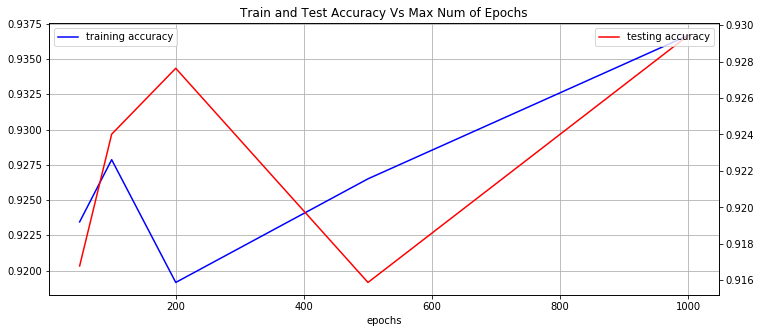

In [83]:
#Plotting the accuracies for the different maximum number of epochs
plot_graph(result,result,'acc','test_acc','training accuracy','testing accuracy','Train and Test Accuracy Vs Max Num of Epochs')